In [49]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.autograd import Variable
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

boston = load_boston()
X_train , X_test , y_train , y_test = train_test_split(boston.data, boston.target, random_state = 0)
# create dummy data for training
#x_values = [i for i in range(11)]
#x_train = np.array(x_values, dtype=np.float32)
#X_train = X_train.reshape(-1, 1)
print(X_train.shape)
print(type(X_train))

#y_values = [2*i + 1 for i in x_values]
#y_train = np.array(y_values, dtype=np.float32)
#y_train = y_train.reshape(-1, 1)
print(y_train.shape)
print(type(y_train))

#데이터셋 정리하고, 어떻게 생겼나 구조를 본 코드

(379, 13)
<class 'numpy.ndarray'>
(379,)
<class 'numpy.ndarray'>


In [50]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, hidden_size, outputSize): #inputSize는 입력 feature의 갯수이고, hidden_size는 히든 사이즈, outputSize는 아웃풋 되는 그 갯수야. 꼭 기억해두자.
        super(linearRegression, self).__init__()
        self.hidden = torch.nn.Linear(cols, hidden_size) #히든레이어야. 교수님께서 추가하라고 하신 부분이야
        self.linear = torch.nn.Linear(hidden_size, outputSize) #이건 아웃풋 레이어야. 출력 결과가 여기에 나올거야.
        #self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        x = F.relu(self.hidden(x)) #습관적으로 넣지 말고 교수님께서 액티베이션 펑션 쓰라고 하셨던 의미 기억하면서 넣기
        out = self.linear(x) #linear output이 나올거야
        return out

#막혀도 답답해하지 말자! 나는 꼭 해결할 수 있다!!

In [51]:
#트레이닝 하이퍼 파라미터 정의
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 200
batch_size = 50 #50개씩 잘라서 받아오는거야. 내 컴퓨터 메모리가 워낙 구려서 말이지. 조금씩 천천히 들어와! 라는 뜻이야
hidden_size = 100

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches. 50개씩 나눠서 넣을 때 몇개가 되는지 계산한거야
cols = X_train.shape[1] #Number of columns in input matrix 이 경우에는 13이 되겠지
n_output = 1 #output dimension이야

model = linearRegression(cols, hidden_size, outputDim)

##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [52]:
#Adam is a specific flavor of gradient decent which is typically better. 하지만 SGD를 써도 무방할 것 같다
criterion = torch.nn.MSELoss()  # this is for regression mean squared loss
#optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #러닝 레이트는 0.01이다
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate) #러닝 레이트는 0.01이다

#datasets = torch.utils.data.TensorDataset(X_train, y_train)
#train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

#x = torch.randn(4, 4)
#y = x.view(16)
#z = x.view(-1, 8)
#print(x.size(), y.size(), z.size())

In [53]:
from sklearn.utils import shuffle

running_loss = 0.0
for epoch in range(epochs):
    X_train, y_train = shuffle(X_train, y_train)
    for i in range(batch_no):
        # Converting inputs and labels to Variable
        #if torch.cuda.is_available():
            #inputs = Variable(torch.from_numpy(X_train).cuda())
            #labels = Variable(torch.from_numpy(y_train).cuda())
        # else:
            #inputs = Variable(torch.from_numpy(X_train).type(torch.float32))
            #labels = Variable(torch.from_numpy(y_train).type(torch.float32))
        start = i * batch_size #50개씩 가져와서 인풋에 넣는거야. 그러면 컴퓨터 메모리가 안 좋아도 빨리 돌릴 수 있겠지?
        end = start + batch_size #시작점부터 50을 더하면 거기가 마지막 위치가 되니까

        inputs = Variable(torch.FloatTensor(X_train[start:end])) #X_train의 시작점부터 마지막점까지만 받아오는거야. 수업에서 어레이 배울 때 배운 그거야.
        labels = Variable(torch.FloatTensor(y_train[start:end])) #이것도 위하고 동일해.
                                                                 # 잘할 수 있다! 자신감을 갖고 코딩하자.
                                                              

        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad() 
      
        # get output from the model, given the inputs
        outputs = model(inputs) #forwar + backward + optimize 

        # get loss for the predicted output
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1)) #label의 1번째 차원 위치에 차원 추가
                                                                #torch.squeeze(labels,dim=1)이면 label의 1번째 차원 위치에서 차원 삭제
                                                                #교수님께서 2D로 만드라고 하셨으니 이렇게 해야해.
        #print(loss)
        # get gradients w.r.t to parameters
        loss.backward() #뒤에서부터 쭉 학습해주는거야

        # update parameters
        optimizer.step() #weight를 업데이트해줘
        running_loss += loss.item()
    
    print('epoch {}, loss {}'.format(epoch, running_loss))
    running_loss = 0.0

epoch 0, loss 4984.359359741211
epoch 1, loss 1400.8828201293945
epoch 2, loss 723.5072860717773
epoch 3, loss 621.1131248474121
epoch 4, loss 511.8691940307617
epoch 5, loss 433.5215187072754
epoch 6, loss 368.8570156097412
epoch 7, loss 371.7358627319336
epoch 8, loss 372.4424705505371
epoch 9, loss 372.95995712280273
epoch 10, loss 332.3107089996338
epoch 11, loss 306.09491539001465
epoch 12, loss 330.17206954956055
epoch 13, loss 312.0094356536865
epoch 14, loss 320.2168159484863
epoch 15, loss 344.745662689209
epoch 16, loss 309.0430107116699
epoch 17, loss 267.59535789489746
epoch 18, loss 289.8078327178955
epoch 19, loss 291.06912422180176
epoch 20, loss 286.2283763885498
epoch 21, loss 274.39043617248535
epoch 22, loss 277.0798091888428
epoch 23, loss 260.0314140319824
epoch 24, loss 261.79137992858887
epoch 25, loss 261.8130741119385
epoch 26, loss 246.55547332763672
epoch 27, loss 253.77092361450195
epoch 28, loss 246.86122512817383
epoch 29, loss 220.29460334777832
epoch 30,

379 379
training r2 score : 0.8743483209107603
testing r2 score : 0.6351745716918971


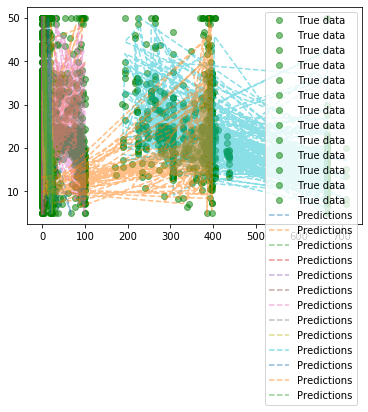

In [54]:
from sklearn.metrics import r2_score

X = Variable(torch.FloatTensor(X_train)) 
result = model(X)
pred = result.data[:,0].numpy()
print(len(pred),len(y_train))
print("training r2 score :", r2_score(pred,y_train))

X = Variable(torch.FloatTensor(X_test))  
result = model(X) #This outputs the value for regression
result=result.data[:,0].numpy()
r2=r2_score(result, y_test)
print("testing r2 score :", r2)

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(X_train).cuda().type(torch.float32))).cpu().data.numpy().type(np.float32)
    else:
        predicted = model(Variable(torch.from_numpy(X_train).type(torch.float32))).data.numpy()
        #predicted = predicted.astype(np.float32)
    #print(predicted)

plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()